In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FwdXJ2YW5ha2FkZS9HaXRodWIvTW9udGUtQ2FybG8tTWV0aG9kcy9jaGFwdGVycy9hcHBsaWNhdGlvbnM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/Users/apurvanakade/miniconda3/lib/python3.12/zipimport.py": 1708117300.842618, "/Users/apurvanakade/miniconda3/lib/python3.12/codecs.py": 1708117300.2231953, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/Users/apurvanakade/miniconda3/lib/python3.12/abc.py": 1708117300.1248448, "/Users/apurvanakade/miniconda3/lib/python3.12/io.py": 1708117300.4300423, "/Users/apurvanakade/miniconda3/lib/python3.12/stat.py": 1708117300.6806324, "/Users/apurvanakade/miniconda3/lib/python3.12/_collections_abc.py": 1708117300.0486746, "/Users/apurvanakade/miniconda3/lib/python3.12/genericpath.

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_82189/400304049.py:25: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



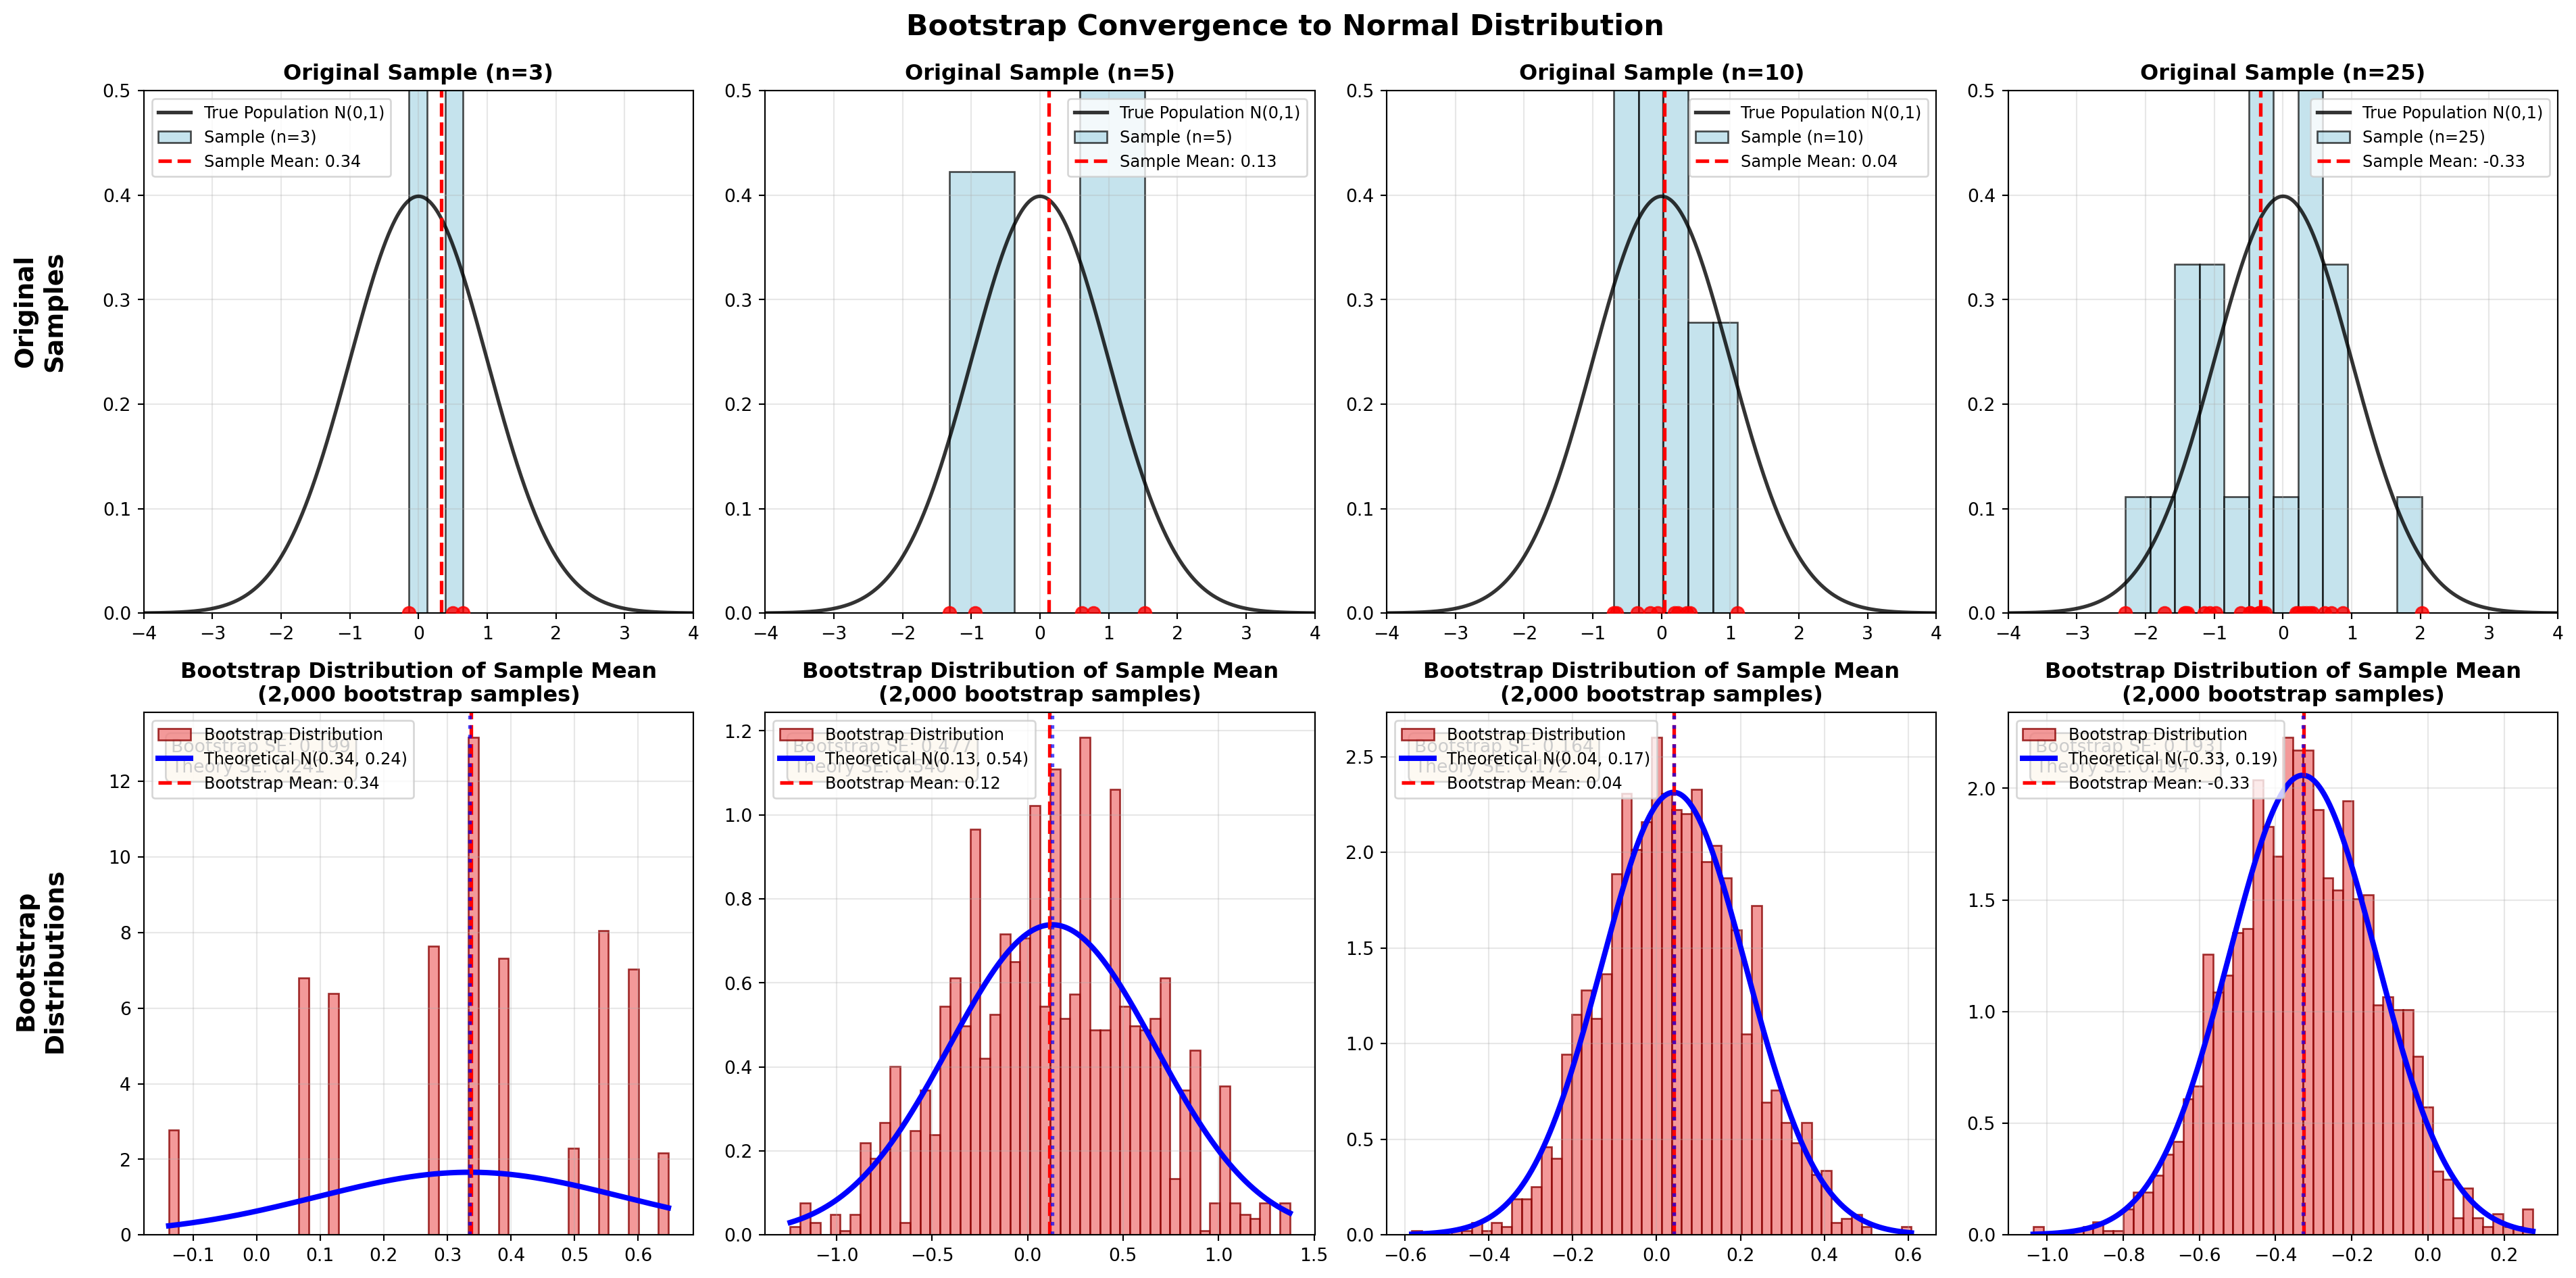

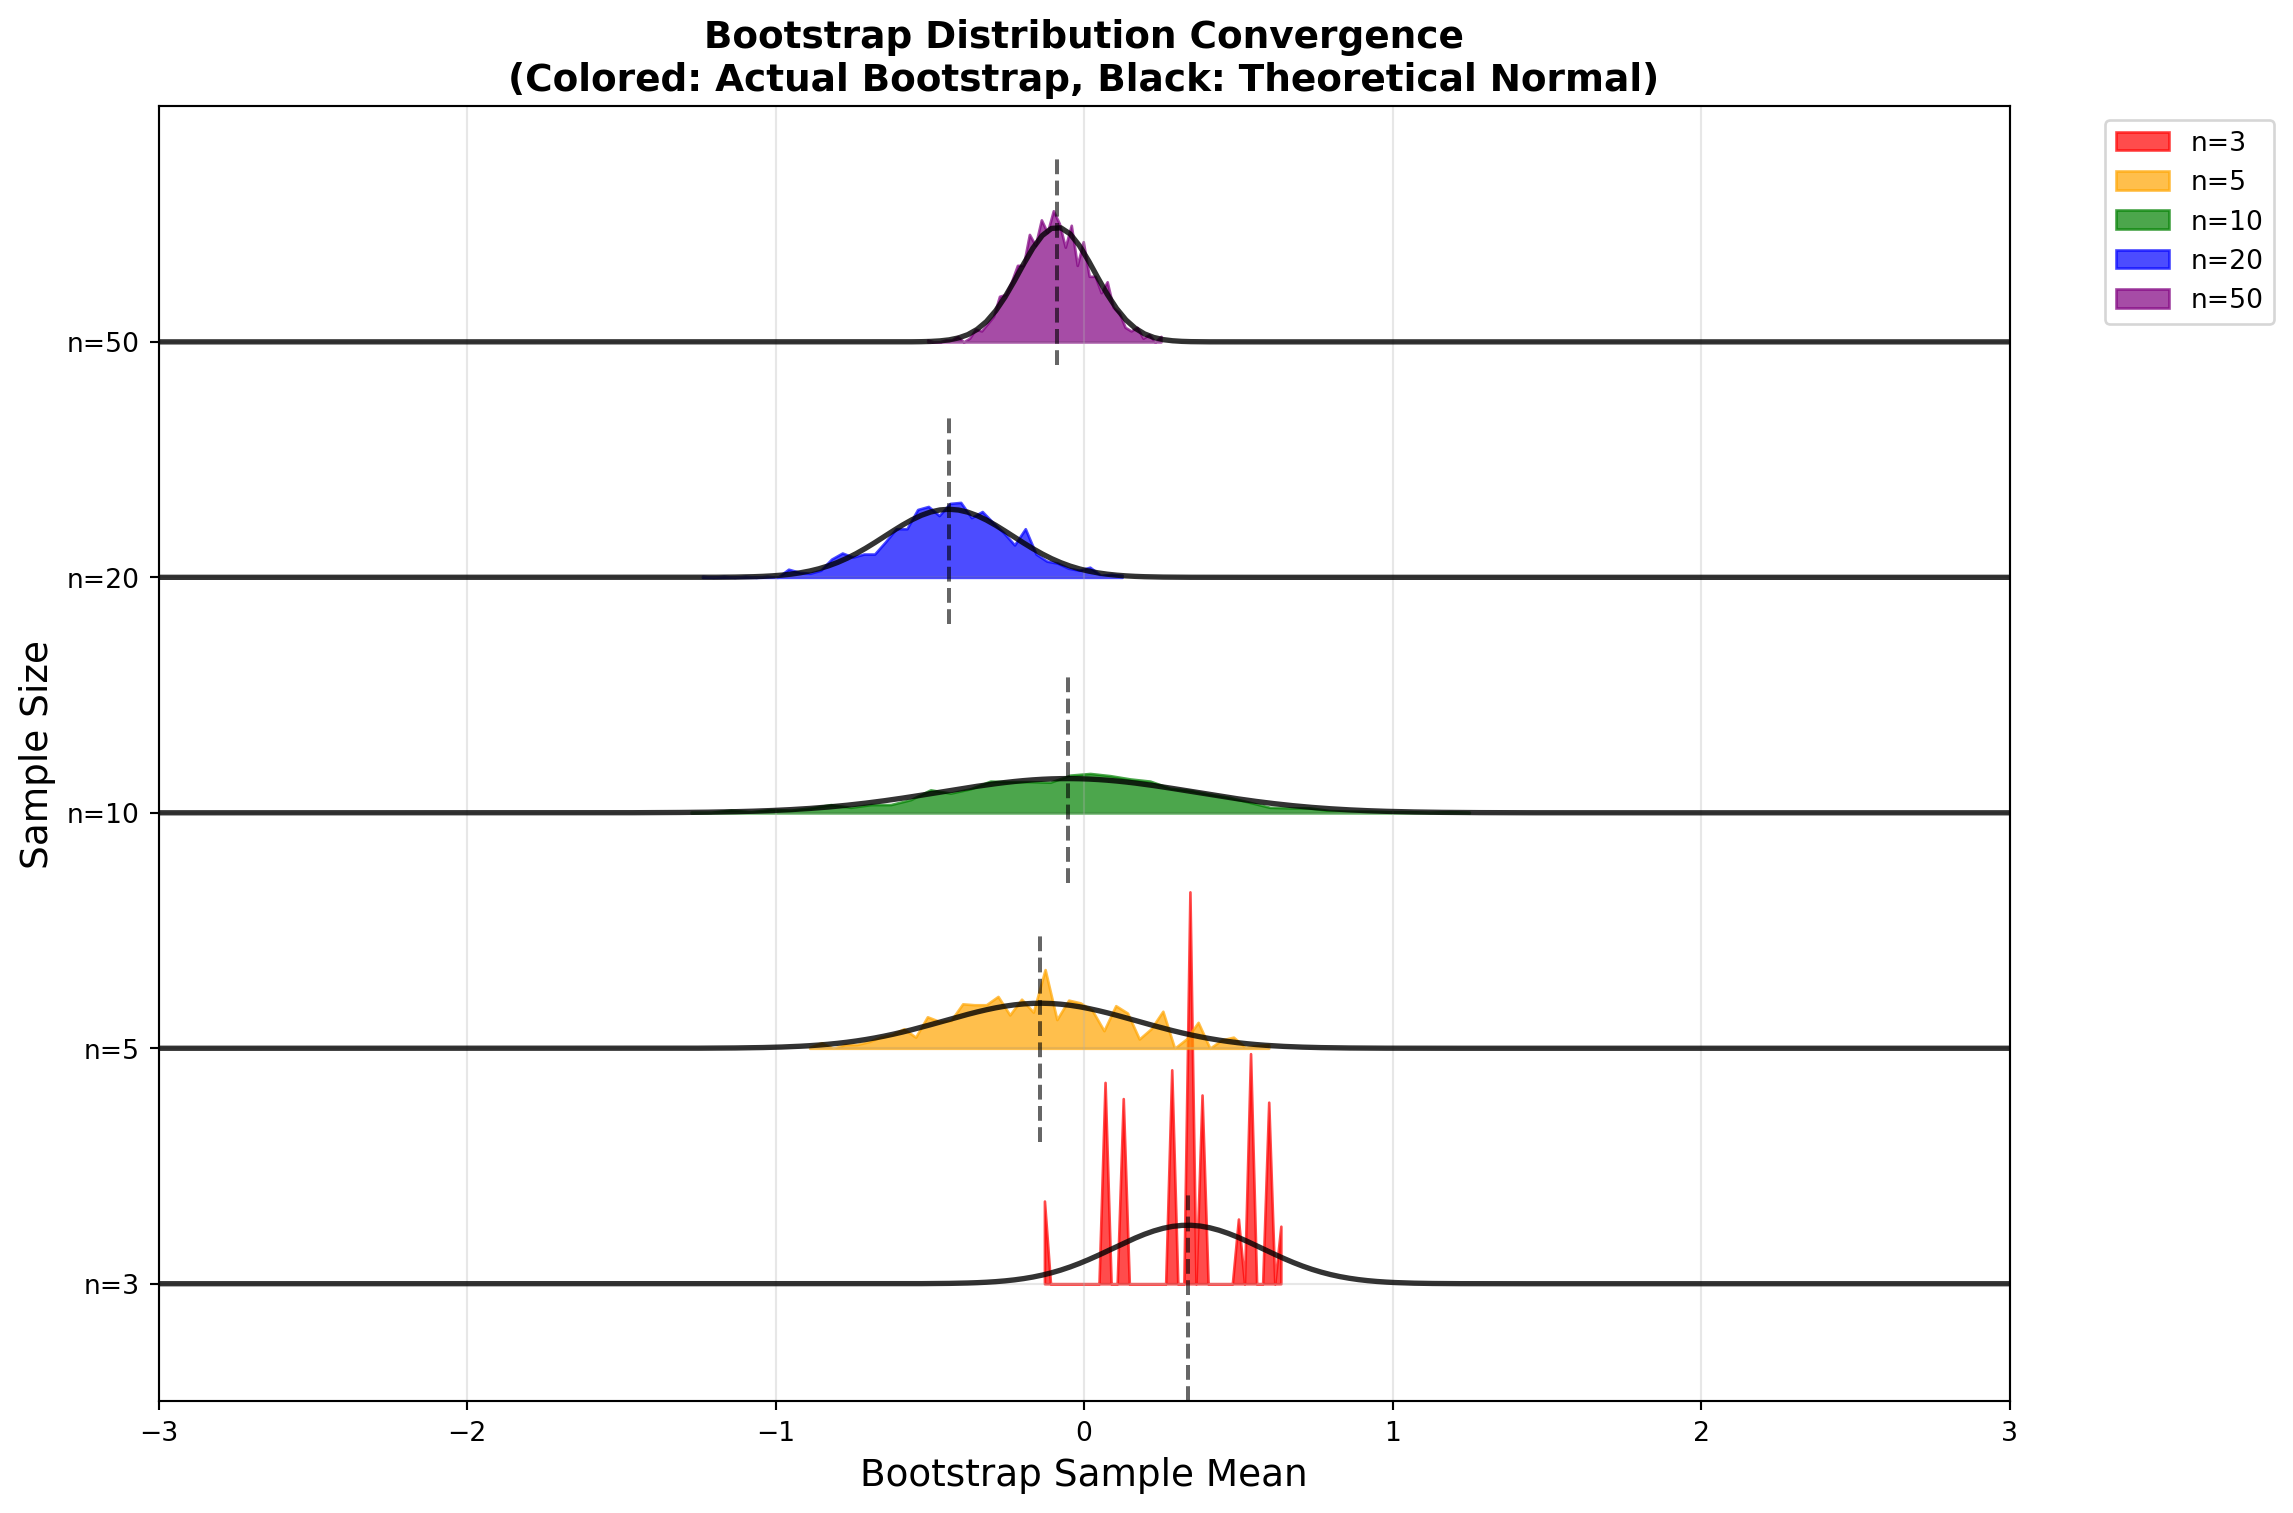

Key Insights:
• Even with very small samples (n=3), bootstrap gives approximately normal distribution
• As sample size increases, bootstrap distribution becomes more concentrated around true mean
• Bootstrap standard error decreases as 1/√n (Central Limit Theorem)
• Bootstrap distribution matches theoretical normal distribution remarkably well


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# True population parameters
true_mean, true_std = 0, 1
true_dist = stats.norm(true_mean, true_std)

def bootstrap_means(sample, n_bootstrap=1000):
    """Bootstrap the sample mean"""
    bootstrap_means = []
    n = len(sample)
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(sample, size=n, replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    return np.array(bootstrap_means)

# Different sample sizes to demonstrate
sample_sizes = [3, 5, 10, 25]
n_bootstrap = 2000

# Create the visualization
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Bootstrap Convergence to Normal Distribution', fontsize=16, fontweight='bold')

# Top row: Original samples
# Bottom row: Bootstrap distributions

x_range = np.linspace(-4, 4, 1000)
true_pdf = true_dist.pdf(x_range)

for i, n in enumerate(sample_sizes):
    # Generate small sample from true normal distribution
    sample = np.random.normal(true_mean, true_std, n)
    
    # Top row: Show the sample with true population
    axes[0, i].plot(x_range, true_pdf, 'k-', linewidth=2, alpha=0.8, label='True Population N(0,1)')
    axes[0, i].hist(sample, bins=max(3, n//2), alpha=0.7, color='lightblue', 
                    edgecolor='black', density=True, label=f'Sample (n={n})')
    axes[0, i].scatter(sample, np.zeros(len(sample)), color='red', s=50, zorder=5, alpha=0.8)
    axes[0, i].axvline(np.mean(sample), color='red', linestyle='--', linewidth=2, 
                       label=f'Sample Mean: {np.mean(sample):.2f}')
    axes[0, i].set_title(f'Original Sample (n={n})', fontsize=12, fontweight='bold')
    axes[0, i].set_xlim(-4, 4)
    axes[0, i].set_ylim(0, 0.5)
    axes[0, i].legend(fontsize=9)
    axes[0, i].grid(True, alpha=0.3)
    
    # Bootstrap the sample means
    boot_means = bootstrap_means(sample, n_bootstrap)
    
    # Bottom row: Show bootstrap distribution
    axes[1, i].hist(boot_means, bins=50, alpha=0.8, color='lightcoral', 
                    edgecolor='darkred', density=True, label=f'Bootstrap Distribution')
    
    # Overlay theoretical normal distribution for bootstrap means
    # Theory: bootstrap means should be ~ N(sample_mean, sample_std/sqrt(n))
    theoretical_mean = np.mean(sample)
    theoretical_std = np.std(sample, ddof=1) / np.sqrt(n)
    theoretical_x = np.linspace(boot_means.min(), boot_means.max(), 1000)
    theoretical_pdf = stats.norm.pdf(theoretical_x, theoretical_mean, theoretical_std)
    axes[1, i].plot(theoretical_x, theoretical_pdf, 'b-', linewidth=3, 
                    label=f'Theoretical N({theoretical_mean:.2f}, {theoretical_std:.2f})')
    
    axes[1, i].axvline(np.mean(boot_means), color='red', linestyle='--', linewidth=2,
                       label=f'Bootstrap Mean: {np.mean(boot_means):.2f}')
    axes[1, i].axvline(theoretical_mean, color='blue', linestyle=':', linewidth=2, alpha=0.7)
    
    axes[1, i].set_title(f'Bootstrap Distribution of Sample Mean\n({n_bootstrap:,} bootstrap samples)', 
                         fontsize=12, fontweight='bold')
    axes[1, i].legend(fontsize=9)
    axes[1, i].grid(True, alpha=0.3)
    
    # Add text with key statistics
    boot_mean = np.mean(boot_means)
    boot_std = np.std(boot_means)
    axes[1, i].text(0.05, 0.95, f'Bootstrap SE: {boot_std:.3f}\nTheory SE: {theoretical_std:.3f}', 
                    transform=axes[1, i].transAxes, fontsize=10, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Add row labels
fig.text(0.02, 0.75, 'Original\nSamples', fontsize=14, fontweight='bold', 
         ha='center', va='center', rotation=90)
fig.text(0.02, 0.25, 'Bootstrap\nDistributions', fontsize=14, fontweight='bold', 
         ha='center', va='center', rotation=90)

plt.tight_layout()
plt.subplots_adjust(left=0.06, top=0.92)
plt.show()

# Show the convergence more clearly with a simpler approach
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sample_sizes_detailed = [3, 5, 10, 20, 50]
colors = ['red', 'orange', 'green', 'blue', 'purple']

# Set up the plot
x_min, x_max = -3, 3
y_positions = np.arange(len(sample_sizes_detailed))

for i, (n, color) in enumerate(zip(sample_sizes_detailed, colors)):
    # Generate sample
    np.random.seed(42 + i)  # Different seed for each sample size
    sample = np.random.normal(true_mean, true_std, n)
    
    # Bootstrap
    boot_means = bootstrap_means(sample, 1000)
    
    # Create histogram data
    hist_counts, hist_bins = np.histogram(boot_means, bins=40, density=True)
    hist_centers = (hist_bins[:-1] + hist_bins[1:]) / 2
    
    # Scale histogram heights for better visualization
    hist_heights = hist_counts * 0.15  # Scale factor for visibility
    
    # Plot the histogram as a filled curve at the appropriate y-position
    y_base = i
    ax.fill_between(hist_centers, y_base, y_base + hist_heights, 
                    alpha=0.7, color=color, label=f'n={n}')
    
    # Add theoretical normal curve
    sample_mean = np.mean(sample)
    sample_se = np.std(sample, ddof=1) / np.sqrt(n)
    x_theory = np.linspace(x_min, x_max, 200)
    y_theory = stats.norm.pdf(x_theory, sample_mean, sample_se)
    y_theory_scaled = y_theory * 0.15  # Same scale factor
    
    ax.plot(x_theory, y_base + y_theory_scaled, 'k-', linewidth=2, alpha=0.8)
    
    # Add vertical line at sample mean
    ax.axvline(sample_mean, ymin=i/len(sample_sizes_detailed), 
               ymax=(i+0.8)/len(sample_sizes_detailed), 
               color='black', linestyle='--', alpha=0.6)

ax.set_xlim(x_min, x_max)
ax.set_ylim(-0.5, len(sample_sizes_detailed))
ax.set_xlabel('Bootstrap Sample Mean', fontsize=14)
ax.set_ylabel('Sample Size', fontsize=14)
ax.set_yticks(y_positions)
ax.set_yticklabels([f'n={n}' for n in sample_sizes_detailed])
ax.set_title('Bootstrap Distribution Convergence\n(Colored: Actual Bootstrap, Black: Theoretical Normal)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

print("Key Insights:")
print("• Even with very small samples (n=3), bootstrap gives approximately normal distribution")
print("• As sample size increases, bootstrap distribution becomes more concentrated around true mean")
print("• Bootstrap standard error decreases as 1/√n (Central Limit Theorem)")
print("• Bootstrap distribution matches theoretical normal distribution remarkably well")

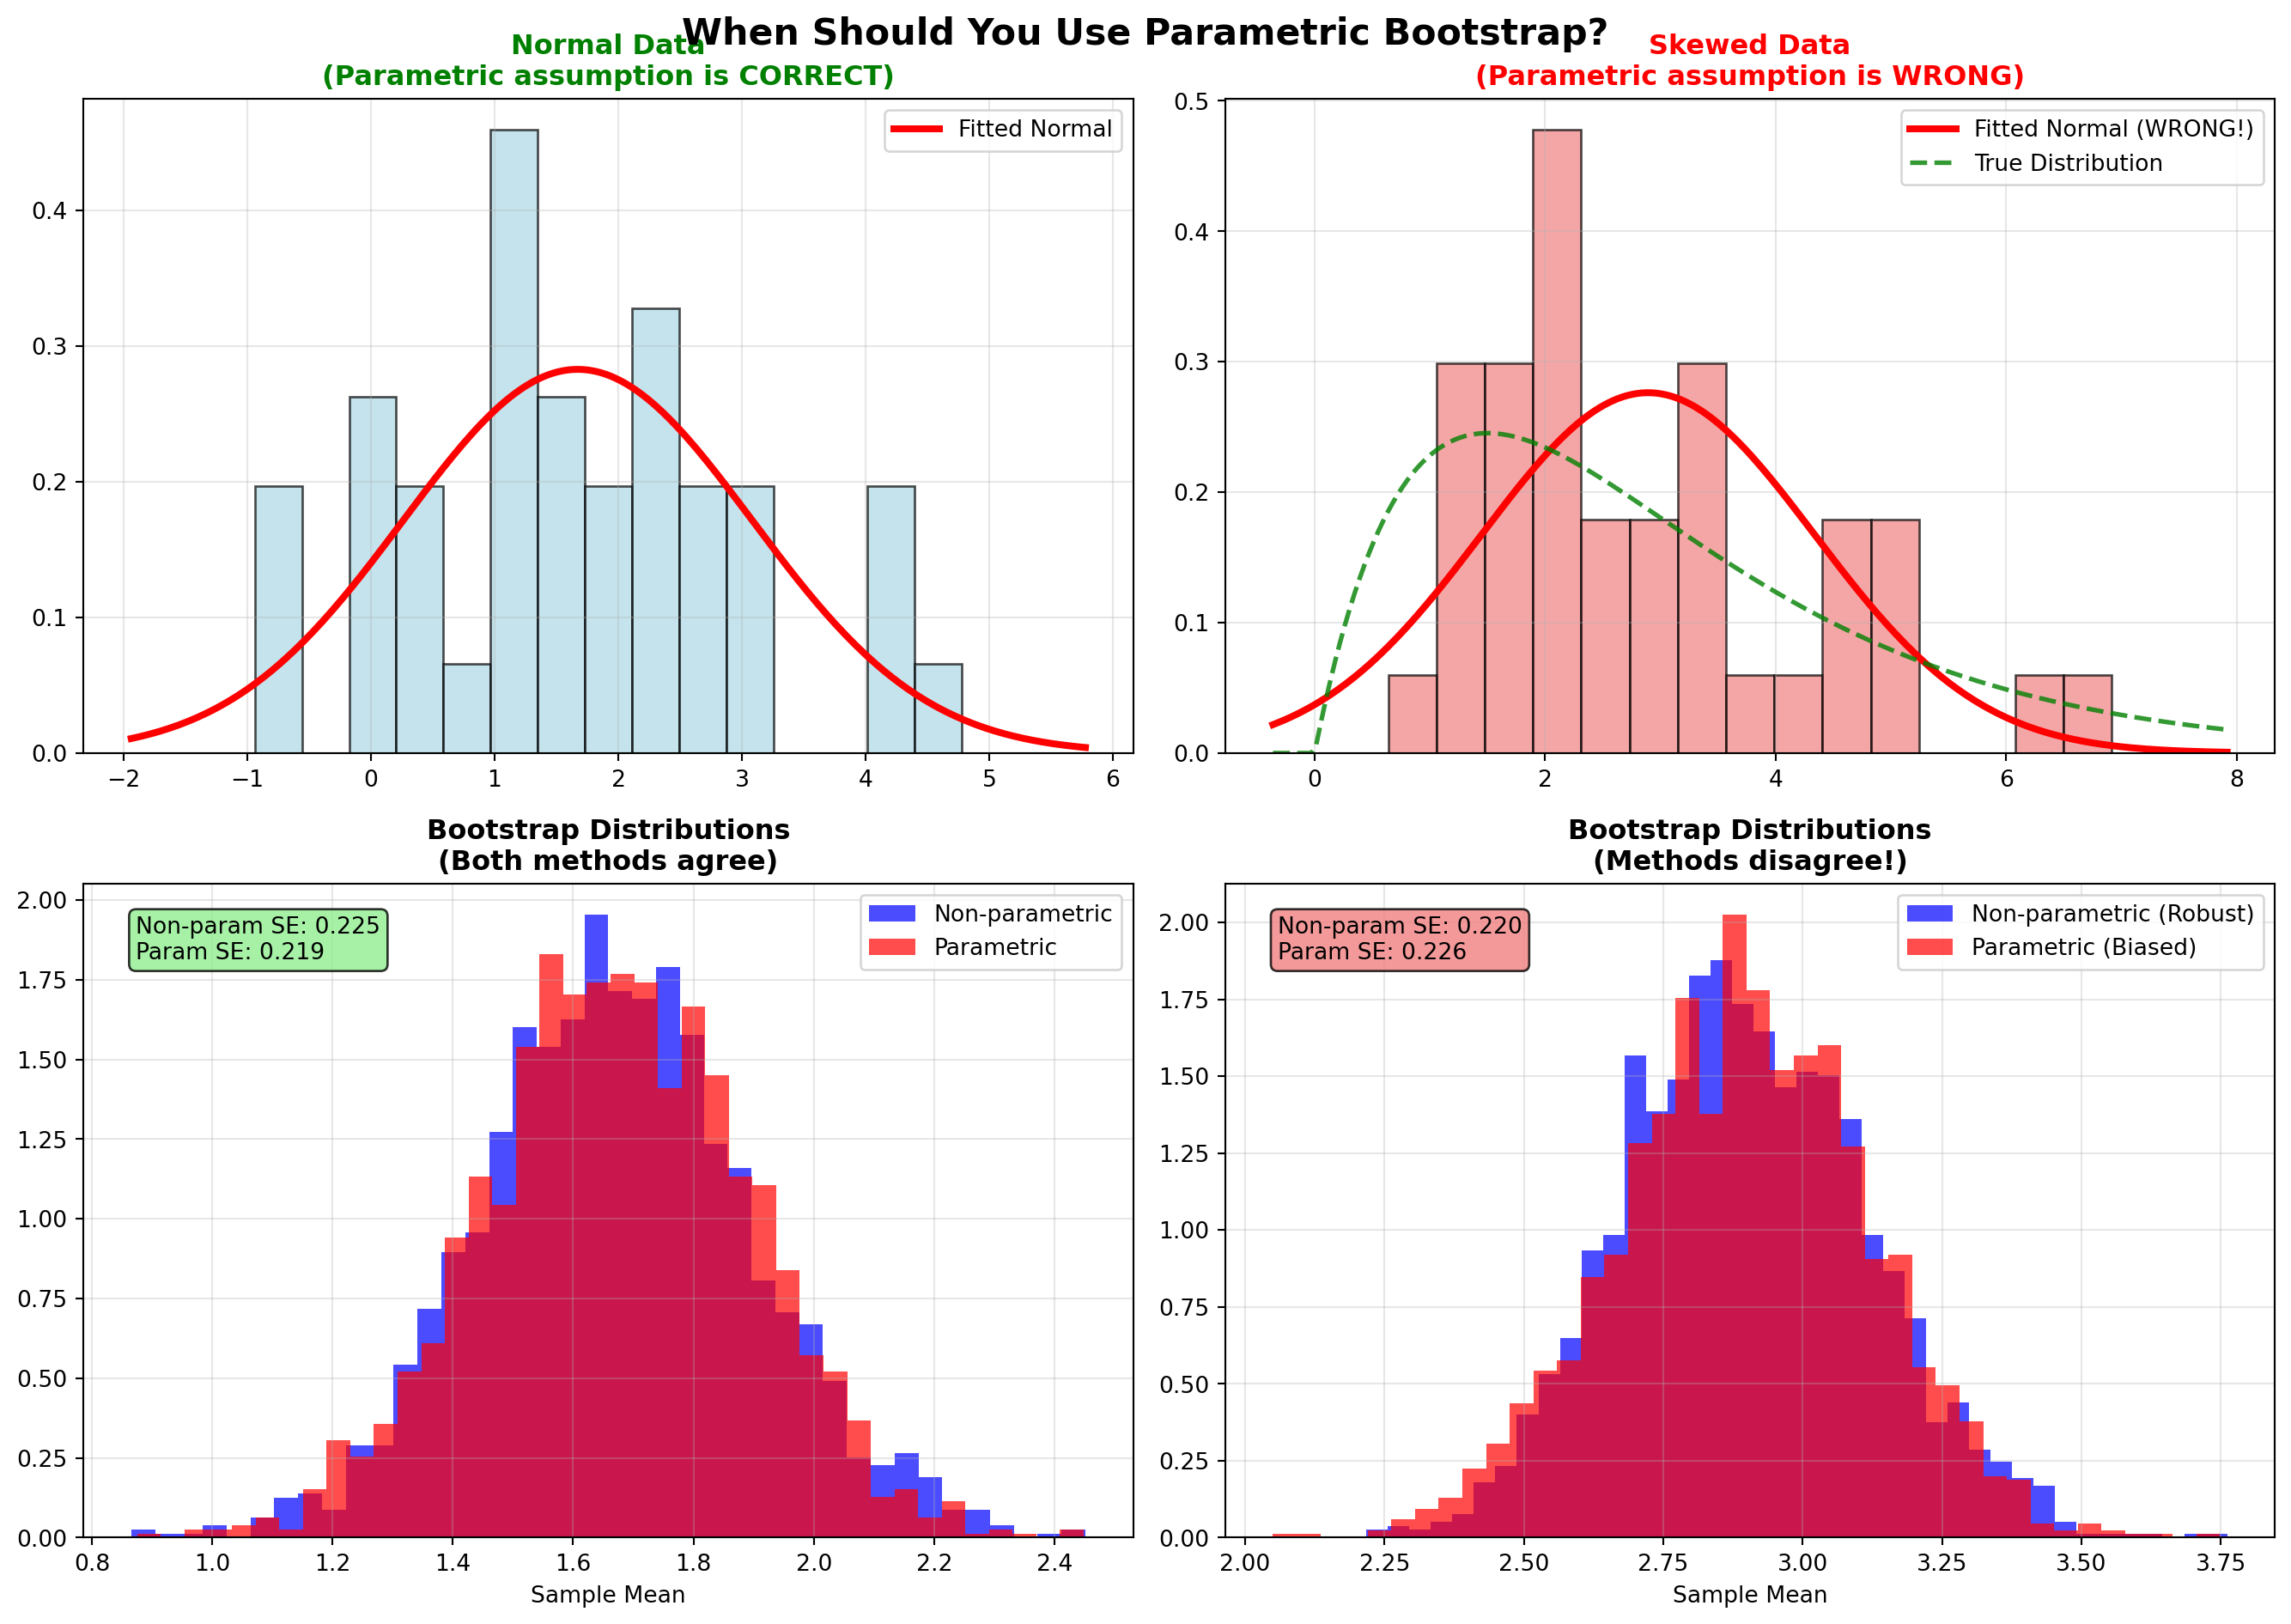

Key Takeaway:
• LEFT: When assumption is correct → both methods work, parametric may be more efficient
• RIGHT: When assumption is wrong → non-parametric is more robust, parametric can be biased


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

def bootstrap_statistic_nonparametric(data, statistic_func, n_bootstrap=1000):
    """Non-parametric bootstrap"""
    bootstrap_stats = []
    n = len(data)
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_stats.append(statistic_func(bootstrap_sample))
    return np.array(bootstrap_stats)

def bootstrap_statistic_parametric(data, distribution, statistic_func, n_bootstrap=1000):
    """Parametric bootstrap assuming a specific distribution"""
    params = distribution.fit(data)
    n = len(data)
    
    bootstrap_stats = []
    for _ in range(n_bootstrap):
        bootstrap_sample = distribution.rvs(*params, size=n)
        bootstrap_stats.append(statistic_func(bootstrap_sample))
    return np.array(bootstrap_stats)

def sample_mean(x):
    return np.mean(x)

# Create two clear scenarios
n_samples = 40
n_bootstrap = 2000

# Scenario 1: Normal data (parametric assumption CORRECT)
normal_data = np.random.normal(loc=2, scale=1.5, size=n_samples)

# Scenario 2: Skewed data (parametric assumption WRONG)
gamma_data = np.random.gamma(shape=2, scale=1.5, size=n_samples)

# Create clean 2x2 visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('When Should You Use Parametric Bootstrap?', fontsize=16, fontweight='bold')

# LEFT COLUMN: Normal data (correct assumption)
# Top left: Original data
axes[0, 0].hist(normal_data, bins=15, alpha=0.7, color='lightblue', 
                edgecolor='black', density=True)
mu_hat, sigma_hat = stats.norm.fit(normal_data)
x_range = np.linspace(normal_data.min()-1, normal_data.max()+1, 200)
fitted_curve = stats.norm.pdf(x_range, mu_hat, sigma_hat)
axes[0, 0].plot(x_range, fitted_curve, 'r-', linewidth=3, 
                label='Fitted Normal')
axes[0, 0].set_title('Normal Data\n(Parametric assumption is CORRECT)', 
                     fontsize=12, fontweight='bold', color='green')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Bottom left: Bootstrap comparison for normal data
nonparam_means_normal = bootstrap_statistic_nonparametric(normal_data, sample_mean, n_bootstrap)
param_means_normal = bootstrap_statistic_parametric(normal_data, stats.norm, sample_mean, n_bootstrap)

axes[1, 0].hist(nonparam_means_normal, bins=40, alpha=0.7, color='blue', 
                density=True, label='Non-parametric')
axes[1, 0].hist(param_means_normal, bins=40, alpha=0.7, color='red', 
                density=True, label='Parametric')
axes[1, 0].set_title('Bootstrap Distributions\n(Both methods agree)', 
                     fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sample Mean')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Add summary stats
np_se = np.std(nonparam_means_normal)
p_se = np.std(param_means_normal)
axes[1, 0].text(0.05, 0.95, f'Non-param SE: {np_se:.3f}\nParam SE: {p_se:.3f}', 
                transform=axes[1, 0].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# RIGHT COLUMN: Skewed data (wrong assumption)
# Top right: Original data
axes[0, 1].hist(gamma_data, bins=15, alpha=0.7, color='lightcoral', 
                edgecolor='black', density=True)
mu_hat_wrong, sigma_hat_wrong = stats.norm.fit(gamma_data)
x_range_gamma = np.linspace(gamma_data.min()-1, gamma_data.max()+1, 200)
fitted_curve_wrong = stats.norm.pdf(x_range_gamma, mu_hat_wrong, sigma_hat_wrong)
axes[0, 1].plot(x_range_gamma, fitted_curve_wrong, 'r-', linewidth=3, 
                label='Fitted Normal (WRONG!)')
# Show true gamma curve
true_gamma = stats.gamma.pdf(x_range_gamma, a=2, scale=1.5)
axes[0, 1].plot(x_range_gamma, true_gamma, 'g--', linewidth=2, 
                label='True Distribution', alpha=0.8)
axes[0, 1].set_title('Skewed Data\n(Parametric assumption is WRONG)', 
                     fontsize=12, fontweight='bold', color='red')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Bottom right: Bootstrap comparison for skewed data
nonparam_means_gamma = bootstrap_statistic_nonparametric(gamma_data, sample_mean, n_bootstrap)
param_means_gamma = bootstrap_statistic_parametric(gamma_data, stats.norm, sample_mean, n_bootstrap)

axes[1, 1].hist(nonparam_means_gamma, bins=40, alpha=0.7, color='blue', 
                density=True, label='Non-parametric (Robust)')
axes[1, 1].hist(param_means_gamma, bins=40, alpha=0.7, color='red', 
                density=True, label='Parametric (Biased)')
axes[1, 1].set_title('Bootstrap Distributions\n(Methods disagree!)', 
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sample Mean')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Add summary stats
np_se_gamma = np.std(nonparam_means_gamma)
p_se_gamma = np.std(param_means_gamma)
axes[1, 1].text(0.05, 0.95, f'Non-param SE: {np_se_gamma:.3f}\nParam SE: {p_se_gamma:.3f}', 
                transform=axes[1, 1].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

print("Key Takeaway:")
print("• LEFT: When assumption is correct → both methods work, parametric may be more efficient")
print("• RIGHT: When assumption is wrong → non-parametric is more robust, parametric can be biased")